In [1]:
# importing basic libraries

import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra

# importing viz libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing preprocessing libraries

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# Metrics

from sklearn.metrics import (accuracy_score,
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix,
                             classification_report)

In [4]:
# Model libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB

In [5]:
# import data

df = pd.read_csv(r'C:\Users\acer\Downloads\BIA - Data Science & Business Analytics\Capstone Project\Dataset\healthcare-dataset-stroke-data.csv')

# Exploratory Data Analysis

In [6]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [7]:
df.shape

(5110, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
# checked for any duplicates if df has

df.duplicated().sum()

0

In [10]:
# finding missing values

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

bmi col is having 201 null values

In [11]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [12]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

Majority of the patients have bmi of 28.7 which is near by to the mean of bmi 28.89

In [13]:
#creating another copy of df for further changes 

df2 = df.copy()
df2.head(2)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   

   stroke  
0       1  
1       1

In [14]:
# filling the NA values with mean values of BMI

df2['bmi'].fillna(df2['bmi'].mean(),inplace=True)

In [15]:
# confirming no missing values now

df2.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
# description of the complete dataset

df2.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.698018     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.800000     0.000000  
50%            91.885000    28.400000     0.000000  
75%           114.090000    32.800000     0.000000  
max           271.740000    97.600000     1.000000

In [17]:
# removing the extra column which is not required for analysis

df2.drop(['id'], axis=1, inplace=True)

In [18]:
df2.head(2)

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0          Urban             228.69  36.600000  formerly smoked       1  
1          Rural             202.21  28.893237     never smoked       1

In [19]:
df2.shape

(5110, 11)

In [20]:
# differnciating categorical & numerical features

categorical_features=[]
numerical_features=[]
for i in df2.columns:
    if df2[i].dtype=="object":
        categorical_features.append(i)
    else:
        numerical_features.append(i)
print('Categorical Variables:',categorical_features) 
print('Numerical Variables:',numerical_features)

Categorical Variables: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Numerical Variables: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [21]:
# check the quality of the data by checking the unique categories of the data in each feature

for col in categorical_features:
    print(col,": {} Number of Unique categories ".format(df2[col].nunique()))
    print(df2[col].unique())
    print("="*50)

gender : 3 Number of Unique categories 
['Male' 'Female' 'Other']
ever_married : 2 Number of Unique categories 
['Yes' 'No']
work_type : 5 Number of Unique categories 
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : 2 Number of Unique categories 
['Urban' 'Rural']
smoking_status : 4 Number of Unique categories 
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


## Data Vizualization

### Correlation Analysis - Univariate Analysis

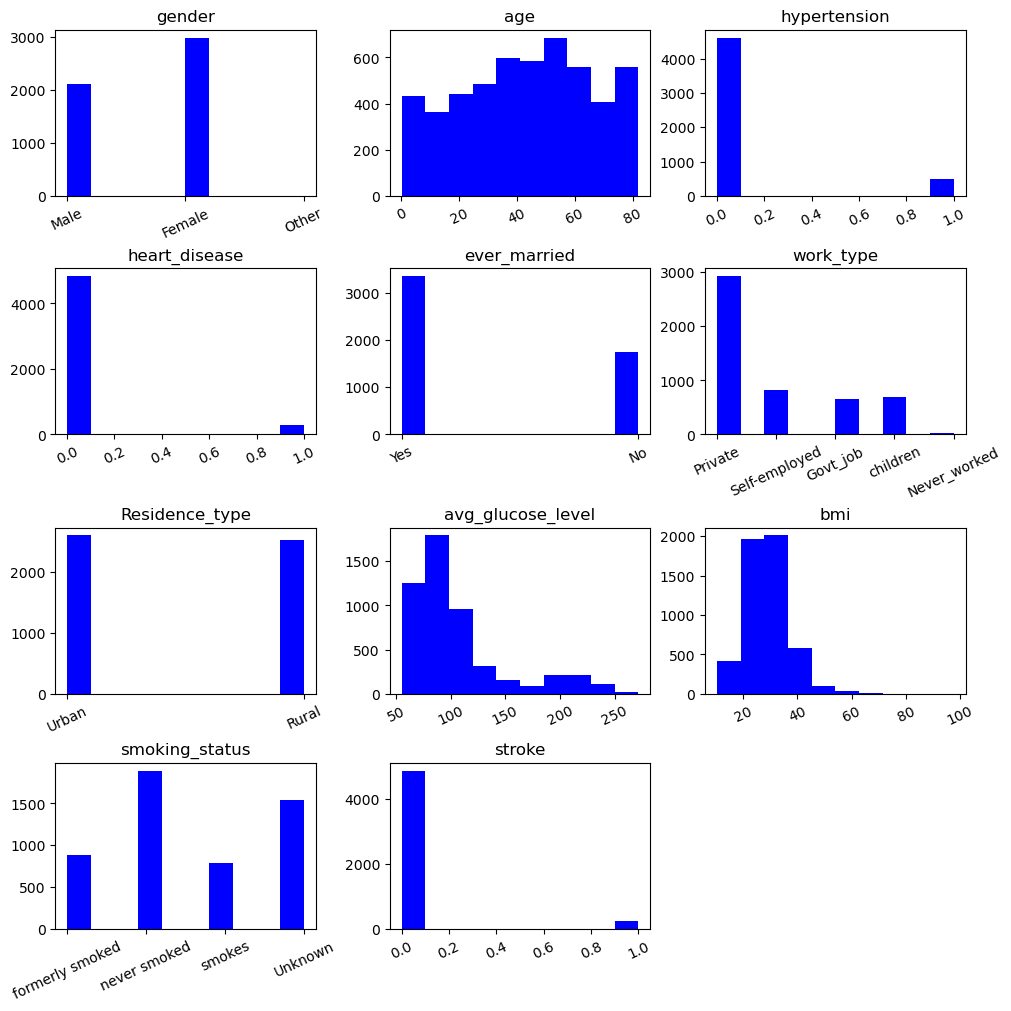

In [22]:
def mass_subplotting():
    rows = 0
    columns = 0
    fig, ax = plt.subplots(4, 3, constrained_layout=True, figsize=(10, 10))
    fig.delaxes(ax[3][2])
    for column in df2.columns:
        ax[rows, columns].hist(df2[column], color='blue')
        ax[rows, columns].tick_params(axis='x', labelrotation = 25)
        ax[rows, columns].set_title(column)
        if columns < 2:
            columns += 1
        else:
            rows += 1
            columns = 0
    plt.show()

mass_subplotting()

Checkpoints:

- In 'gender' attribute, 'female' category is predominant.
- ‘age' of people varies between 0-80 or bit above 80 yrs.
- No. of people with 'hypertension' or 'heart_disease' are low.
- 'ever_married' category is dominant.
- In work_type category, most of the people work in 'private' sector, 'never_worked' being the lowest. Also, it contains    'children' category.
- No big difference in categories of 'Residence_type'.
- never smoked and Unknown categories are dominant in 'smoking_status'.
- No. of people who had stroke are less in 'stroke' category.

In [23]:
df2['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [24]:
pd.crosstab(df['work_type'], df2['stroke'], margins=True).style.background_gradient(cmap='summer_r')

In [25]:
df2['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [26]:
pd.crosstab(df['smoking_status'], df2['stroke'], margins=True).style.background_gradient(cmap='summer_r')

Records for 'children' in work_type and "Unknown' in smoking_status are quite high, so going to keep them. 'Never_worked' category has very low records, with no stroke, hence removing them.

In [27]:
# dropped the never worked category, as there were very few records. 

df2 = df2[df2['work_type']!= 'Never_worked']
df2.shape

(5088, 11)

### Bivariate Analysis - Numerical Variables vs Stroke

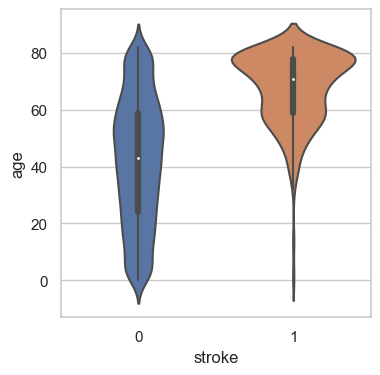

In [28]:
# age w.r.t stroke

sns.set(style="whitegrid")
plt.figure(figsize=(4, 4))
sns.violinplot(data=df2, x='stroke', y='age')
plt.show()

- Strokes begin to increase around age 40 and keeps gradually increasing wrt age.

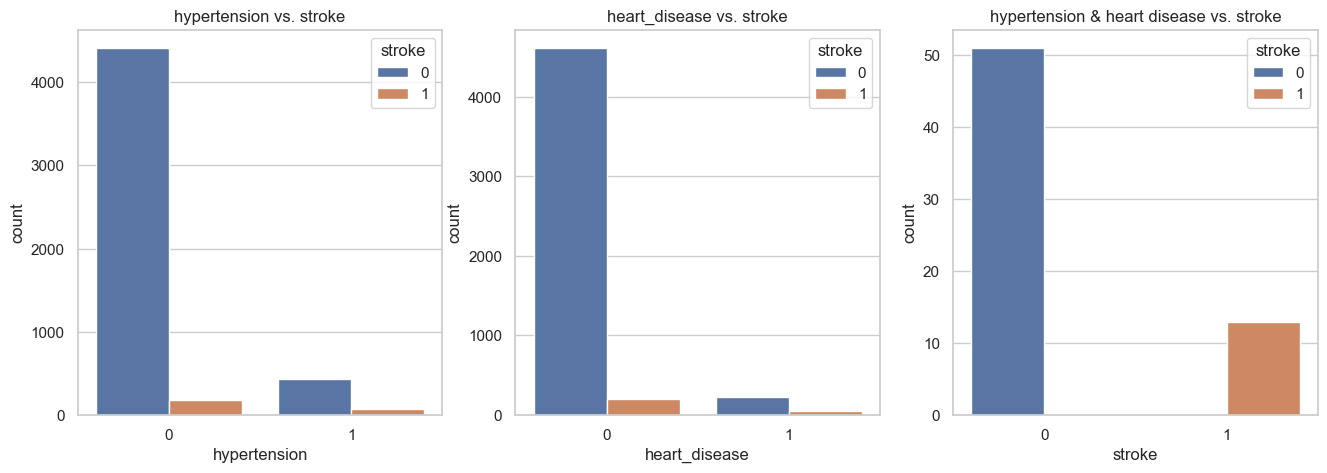

In [30]:
# hypertension & heart_disease w.r.t. stroke

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(data=df2, x='hypertension', hue='stroke', ax=axes[0])
axes[0].set_title('hypertension vs. stroke')

sns.countplot(data=df2, x='heart_disease', hue='stroke', ax=axes[1])
axes[1].set_title('heart_disease vs. stroke')

# people with both hypertension & heart_disease

temp_filter = df2.loc[(df2['hypertension'] == 1) & (df2['heart_disease'] == 1)]
sns.countplot(data=temp_filter, x='stroke', hue='stroke', ax=axes[2])
axes[2].set_title('hypertension & heart disease vs. stroke')

plt.show()

In [31]:
stroke_rate_with_hypertension = (df2[df2['hypertension'] == 1]['stroke'].mean()) * 100
stroke_rate_without_hypertension = (df2[df2['hypertension'] == 0]['stroke'].mean()) * 100
print('% of stroke with hypertension:', stroke_rate_with_hypertension)
print('% of stroke without hypertension:', stroke_rate_without_hypertension)

% of stroke with hypertension: 13.253012048192772
% of stroke without hypertension: 3.986928104575163


In [32]:
stroke_rate_with_heart_disease = (df2[df2['heart_disease'] == 1]['stroke'].mean()) * 100
stroke_rate_without_heart_disease = (df2[df2['heart_disease'] == 0]['stroke'].mean()) * 100
print('% of stroke with heart_disease:', stroke_rate_with_heart_disease)
print('% of stroke without heart_disease:', stroke_rate_without_heart_disease)

% of stroke with heart_disease: 17.02898550724638
% of stroke without heart_disease: 4.197838736492103


- Observed that having hypertension or heart disease does not guaruantee a stroke, but there does appear to be a higher average of those that do. 
- Also observed that having both hypertension and heart disease does not guaruantee a stroke, however, our sample of    individuals who have both is very small.

In [33]:
# avg_glucose_level w.r.t. stroke

min_avg_glucose_level = df2['avg_glucose_level'].min()
max_avg_glucose_level = df2['avg_glucose_level'].max()

print('min avg glucose level:', min_avg_glucose_level)
print('max avg glucose level:', max_avg_glucose_level)

min avg glucose level: 55.12
max avg glucose level: 271.74


In [34]:
# converting continuous data into discreet data

glucose_bins = [55.12, 70, 99, 125, 271.74]
glucose_labels = ['Low', 'Normal', 'Pre-Diabetes', 'Diabetes']

df2['avg_glucose_level_group'] = pd.cut(df2['avg_glucose_level'], bins=glucose_bins, labels=glucose_labels, right=False)
print(df2[['avg_glucose_level', 'avg_glucose_level_group']].head())

   avg_glucose_level avg_glucose_level_group
0             228.69                Diabetes
1             202.21                Diabetes
2             105.92            Pre-Diabetes
3             171.23                Diabetes
4             174.12                Diabetes


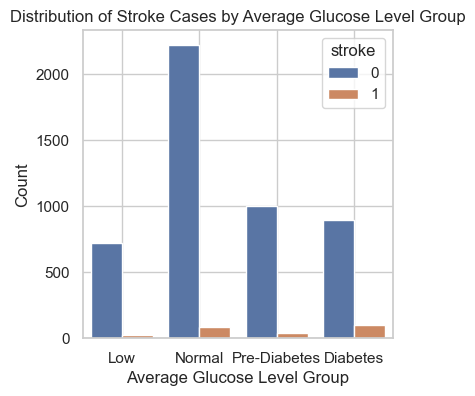

In [34]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(data=df2, x='avg_glucose_level_group', hue='stroke')
plt.title("Distribution of Stroke Cases by Average Glucose Level Group")
plt.xlabel("Average Glucose Level Group")
plt.ylabel("Count")
plt.grid(True)
plt.show()

It seems individuals with "Diabetes" tend to have the highest stroke risk, while those with "Low" average glucose levels have the lowest risk. Assuming, given glucose level is avg glucose level. 

In [35]:
# bmi w.r.t. stroke

min_bmi = df2['bmi'].min()
max_bmi = df2['bmi'].max()

print('min bmi:', min_bmi)
print('max bmi:', max_bmi)


min bmi: 10.3
max bmi: 97.6


In [36]:
bmi_bins = [10, 18.5, 24.9, 29.9, 34.9, 39.9, 50, float('inf')]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obesity Class I', 'Obesity Class II', 'Obesity Class III' , 'Extreme Obesity']
df2['bmi_group'] = pd.cut(df2['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)
print(df2[['bmi', 'bmi_group']].head())

         bmi         bmi_group
0  36.600000  Obesity Class II
1  28.893237        Overweight
2  32.500000   Obesity Class I
3  34.400000   Obesity Class I
4  24.000000            Normal


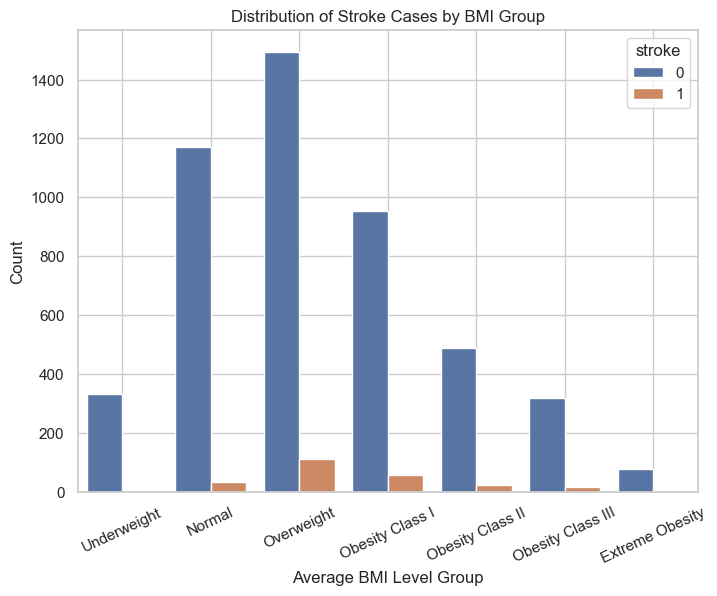

In [39]:
plt.rcParams['figure.figsize'] = (8,6)
ax = sns.countplot(data=df2, x='bmi_group', hue='stroke')
plt.title("Distribution of Stroke Cases by BMI Group")
plt.xlabel("Average BMI Level Group")
plt.ylabel("Count")
plt.grid(True)
plt.xticks(rotation=25)
plt.show()

It's evident from the plot that there isn't a straightforward correlation between BMI and the occurrence of strokes. Strokes can happen across a broad spectrum of BMI values.

### Bivariate Analysis - Categorical Variables vs Stroke

In [37]:
# % of stroke w.r.t. gender

df2['gender'].value_counts()

Female    2983
Male      2104
Other        1
Name: gender, dtype: int64

In [38]:
print (f'A female person has a probability of {round(df2[df2["gender"]=="Female"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A male person has a probability of {round(df2[df2["gender"]=="Male"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person from the other category of gender has a probability of {round(df2[df2["gender"]=="Other"]["stroke"].mean()*100,2)} % get a stroke')

A female person has a probability of 4.73 % get a stroke

A male person has a probability of 5.13 % get a stroke

A person from the other category of gender has a probability of 0.0 % get a stroke


In [39]:
fig = px.histogram(df2, x='gender', color='stroke',width=400, height=400)
fig.show()

Male compare to female are more likely to get stroke, but difference between female and male is very small.

In [40]:
# % of stroke w.r.t. ever_married parameter

df2['ever_married'].value_counts()

Yes    3353
No     1735
Name: ever_married, dtype: int64

In [41]:
print (f'A person married (or married before) has a probability of {round(df2[df2["ever_married"]=="Yes"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person never married has a probability of {round(df2[df2["ever_married"]=="No"]["stroke"].mean()*100,2)} % get a stroke')

A person married (or married before) has a probability of 6.56 % get a stroke

A person never married has a probability of 1.67 % get a stroke


In [42]:
fig = px.histogram(df, x='ever_married', color='stroke',width=400, height=400)
fig.show()

Stroke probability is higher for the people who are married(or married before).

In [43]:
# % of stroke w.r.t. work_type parameter

df2['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Name: work_type, dtype: int64

In [44]:
print (f'A person with private work type has a probability of {round(df2[df2["work_type"]=="Private"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'Self-employed person has a probability of {round(df2[df2["work_type"]=="Self-employed"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person with a goverment job has a probability of {round(df2[df2["work_type"]=="Govt_job"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A child has a probability of {round(df2[df2["work_type"]=="children"]["stroke"].mean()*100,2)} % get a stroke')

A person with private work type has a probability of 5.09 % get a stroke

Self-employed person has a probability of 7.94 % get a stroke

A person with a goverment job has a probability of 5.02 % get a stroke

A child has a probability of 0.29 % get a stroke


In [45]:
fig = px.histogram(df2, x='work_type', color='stroke',width=400, height=400)
fig.show()

Self employed people have relatively higher probability to get stroke. Sequentially come Private and Govt job type. Children being the lowest. Never_worked, have removed already due to lesser non impacting records.

In [46]:
# % of stroke w.r.t. Residence_type parameter

df2['Residence_type'].value_counts()

Urban    2581
Rural    2507
Name: Residence_type, dtype: int64

In [47]:
print (f'A person, who lives in urban area, has a probability of {round(df2[df2["Residence_type"]=="Urban"]["stroke"].mean()*100,2)} %  get a stroke')

print()

print (f'A person, who lives in rural area, has a probability of {round(df2[df2["Residence_type"]=="Rural"]["stroke"].mean()*100,2)} % get a stroke')

A person, who lives in urban area, has a probability of 5.23 %  get a stroke

A person, who lives in rural area, has a probability of 4.55 % get a stroke


In [48]:
fig = px.histogram(df2, x='Residence_type', color='stroke',width=400, height=400)
fig.show()

There is not much difference depending on residence type. People in urban area slightly have more probablity to get a stroke. 

In [49]:
# % of stroke w.r.t. smoking_status parameter

df2['smoking_status'].value_counts()

never smoked       1878
Unknown            1536
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [50]:
print (f'A formerly smoked person has a probability of {round(df2[df2["smoking_status"]=="formerly smoked"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person never smoked has a probability of {round(df2[df2["smoking_status"]=="never smoked"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person smokes has a probability of {round(df2[df2["smoking_status"]=="smokes"]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person whose smoking history is not known,has a probability of {round(df2[df2["smoking_status"]=="Unknown"]["stroke"].mean()*100,2)} % get a stroke')

A formerly smoked person has a probability of 7.91 % get a stroke

A person never smoked has a probability of 4.79 % get a stroke

A person smokes has a probability of 5.32 % get a stroke

A person whose smoking history is not known,has a probability of 3.06 % get a stroke


In [51]:
fig = px.histogram(df2, x='smoking_status', color='stroke',width=400, height=400)
fig.show()

Formerly smoked category people having higher probability and smoking staus unknown people being the lowest for getting a stroke.

### Multivariate Analysis

                        age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.275622       0.263414           0.238000   
hypertension       0.275622      1.000000       0.108005           0.174360   
heart_disease      0.263414      0.108005       1.000000           0.161798   
avg_glucose_level  0.238000      0.174360       0.161798           1.000000   
bmi                0.325450      0.159981       0.038544           0.168946   
stroke             0.244878      0.127626       0.134712           0.131865   

                        bmi    stroke  
age                0.325450  0.244878  
hypertension       0.159981  0.127626  
heart_disease      0.038544  0.134712  
avg_glucose_level  0.168946  0.131865  
bmi                1.000000  0.038615  
stroke             0.038615  1.000000  


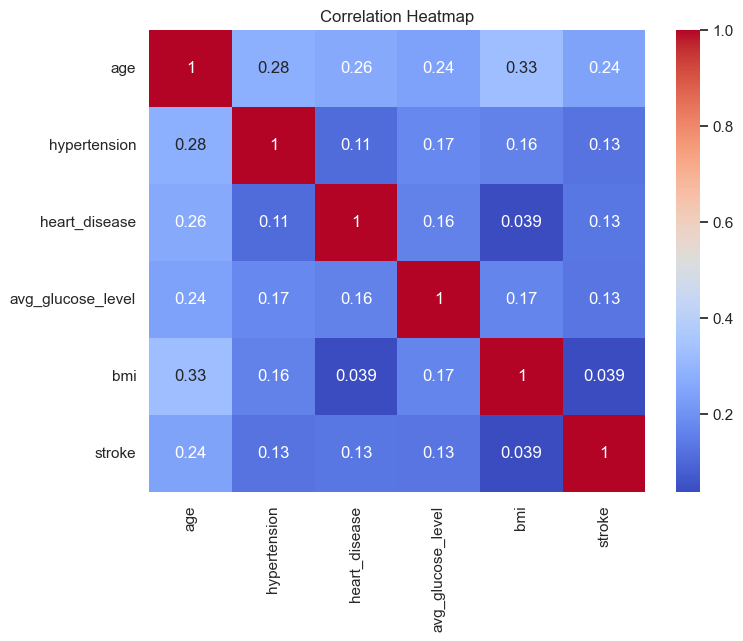

In [52]:
# Select the relevant columns in your DataFrame
selected_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
df_selected = df2[selected_columns]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

- Age has a positive correlation of approximately 0.245 with stroke.
- Hypertension has a positive correlation of approximately 0.128 with stroke.
- Heart disease has a positive correlation of approximately 0.135 with stroke.
- Average glucose level has a positive correlation of approximately 0.132 with stroke.
- BMI (body mass index) has a very weak positive correlation of approximately 0.039 with stroke. 

In [53]:
# Age & Average Glucose Level

fig = px.scatter(df2, y='avg_glucose_level', x='age', title='Age & Average Glucose Level',color='stroke', hover_data = df2[['stroke']])
fig.show()

40+ age group is having noticeable increase in avg_gluose_level and so the stroke rate.

In [54]:
# Average Glucose Level & BMI

fig = px.scatter(df2, y='bmi', x='avg_glucose_level', title='BMI & Avg_Glucose_level',color='stroke', hover_data = df2[['stroke']])
fig.show()

BMI range has a broad spectrum. Max bmi value for the person who suffered stroke is 56.6. BMI cant guarantee a stroke, but tending to be diabetic has higher chances to get a stroke.

In [55]:
# Prevalence of Heart Disease by Age Group

age_bins = [0, 20, 40, 60, 80, float('inf')]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81+']
df2['age_group'] = pd.cut(df2['age'], bins=age_bins, labels=age_labels, right=False)
print(df2[['age', 'age_group']].head())

    age age_group
0  67.0     61-80
1  61.0     61-80
2  80.0       81+
3  49.0     41-60
4  79.0     61-80


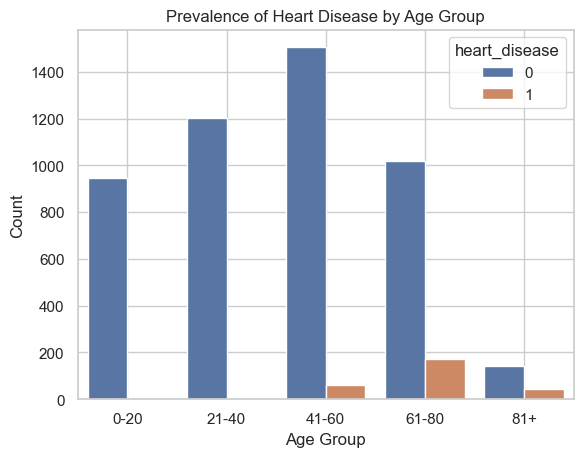

In [57]:
sns.countplot(x="age_group", hue="heart_disease", data=df2)
plt.title("Prevalence of Heart Disease by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In the age groups "0-20" and "21-40" the count of individuals without heart disease ("No") is noticeably higher than those with heart disease ("Yes"). Starting from the "41-60" age group, there is a gradual increase in the count of individuals with heart disease.

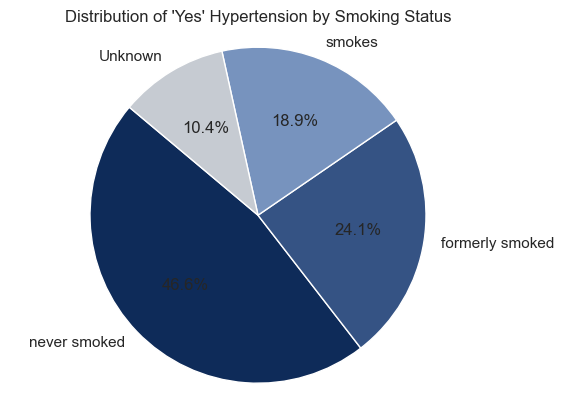

In [56]:
# checking if smoking status has an influence on Hypertension

import matplotlib.pyplot as plt

# Filter the DataFrame for "Yes" hypertension cases
yes_hypertension_df = df2[df2['hypertension'] == 1]

# Count the occurrences of each smoking status
smoking_counts = yes_hypertension_df['smoking_status'].value_counts()

# Define custom colors
custom_colors = ['#0E2B59', '#355384', '#7793BE', '#C6CBD2']

# Create a pie chart
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', colors=custom_colors, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Set the title
plt.title("Distribution of 'Yes' Hypertension by Smoking Status")

# Show the pie chart
plt.show()

The largest segment represents individuals who have "never smoked," indicating that a significant portion of individuals with hypertension have never smoked. The "formerly smoked" segment is the second largest, suggesting that a notable number of individuals with hypertension are former smokers. Relatively smaller segments represent individuals who either currently smoke ("smokes") or have an "unknown" smoking status.

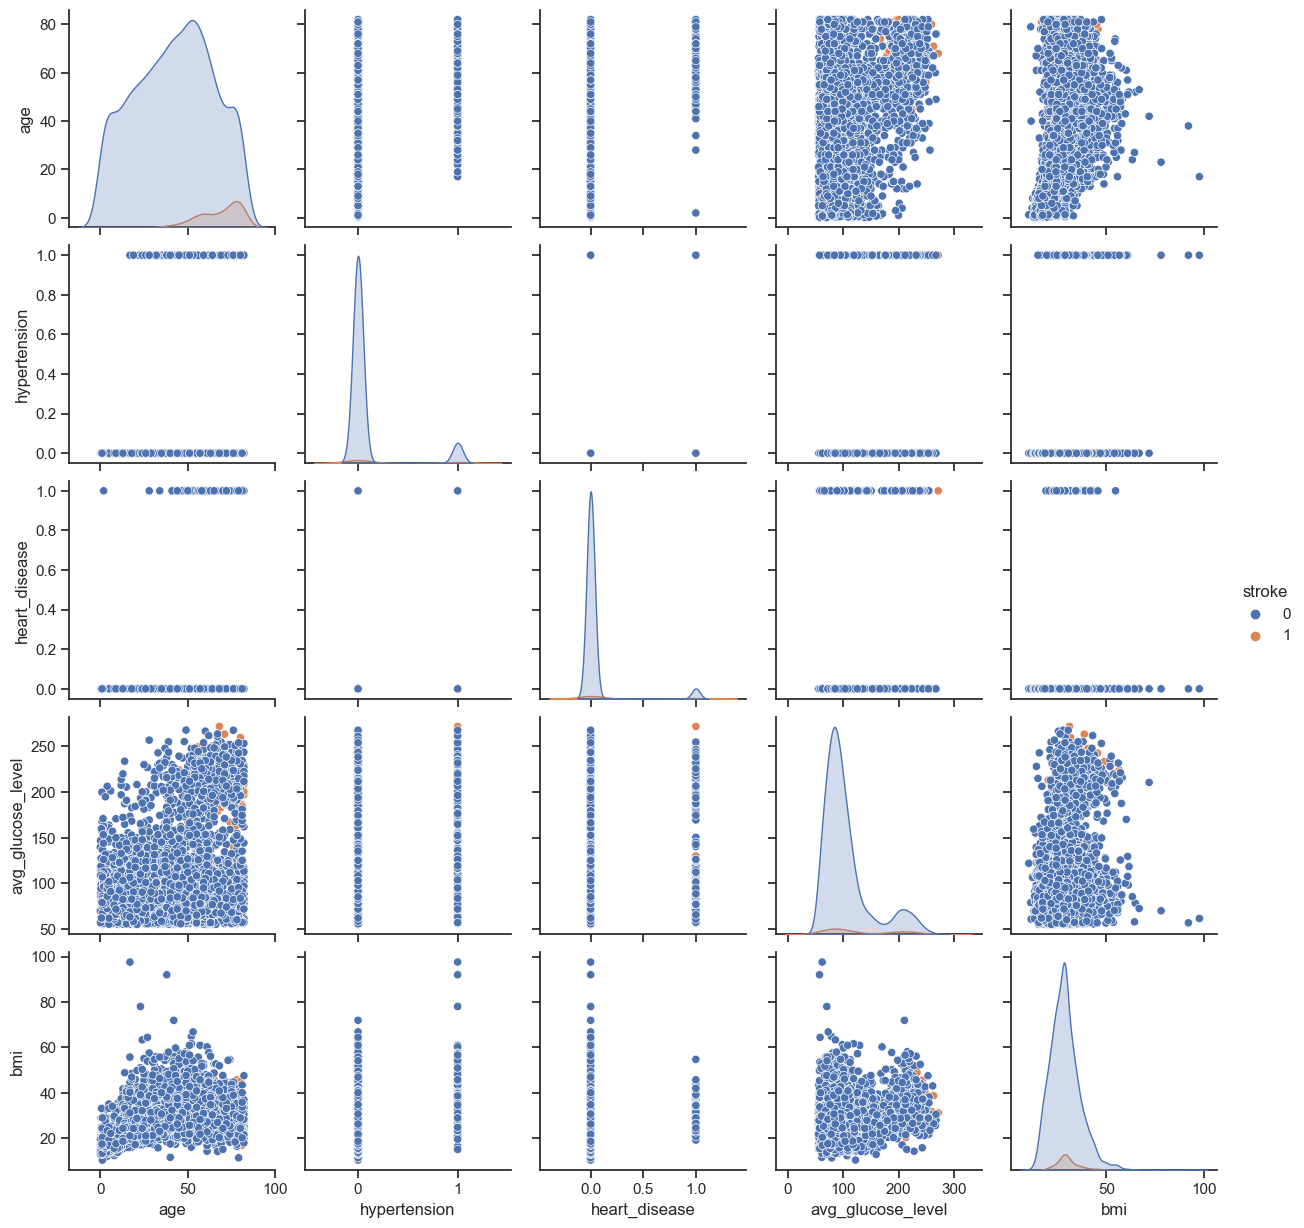

In [57]:
# Create pair plots with 'stroke' as the hue

sns.set(style="ticks")
sns.pairplot(df_selected, hue='stroke', diag_kind='kde')
plt.show()

In [58]:
df3 = df.copy()  #just a backup copy of orginal data

## Data Preprocessing

### Outliers Handling

In [59]:
df2.shape

(5088, 14)

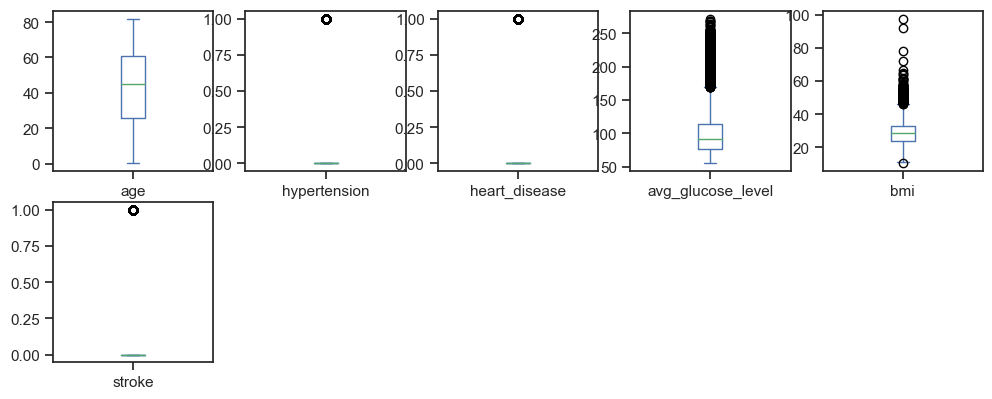

In [60]:
# outliers detection and handling

ax_array = df2.plot(kind="box", subplots=True, figsize=(12, 12), layout=(5, 5))
plt.show()

BMI attribute has some outliers per above plots.

In [61]:
x = df2['bmi'].max()
print(x)

97.6


In [62]:
y = df2['bmi'].min()
print(y)

10.3


In [63]:
print("outliers:" , df2[(df2['bmi'] >= 56.6)].count())

outliers: gender                     23
age                        23
hypertension               23
heart_disease              23
ever_married               23
work_type                  23
Residence_type             23
avg_glucose_level          23
bmi                        23
smoking_status             23
stroke                     23
avg_glucose_level_group    23
bmi_group                  23
age_group                  23
dtype: int64


In [64]:
df2=df2[(df2['bmi'] <= 56.6)]

In [65]:
df2.shape

(5067, 14)

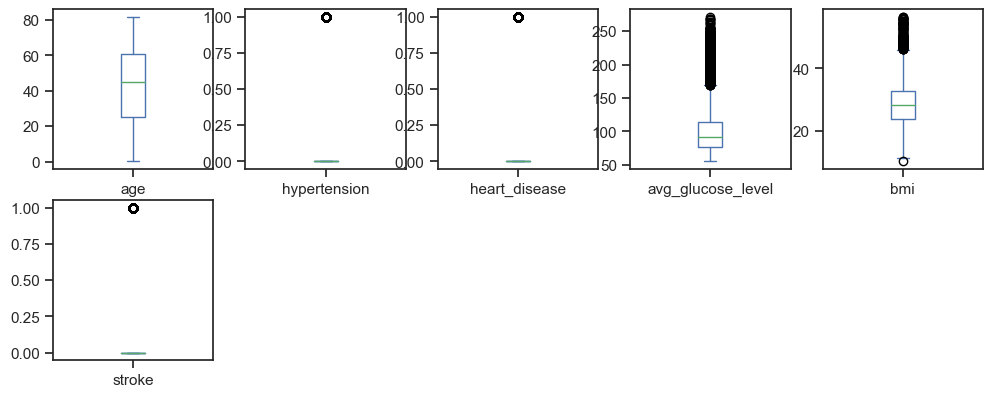

In [66]:
ax_array = df2.plot(kind="box", subplots=True, figsize=(12, 12), layout=(5, 5))
plt.show()

Outliers can affect the performance of machine learning models, so addressed outliers for 'bmi' attribute. Kept only records which are lower than or equal to 56.6 value. Note: BMI has weak correlation with stroke.

### Category Variables Encoding

In [67]:
df2=df2[(df2['gender'] != 'Other')]

In [68]:
df2['gender'].value_counts()

Female    2970
Male      2096
Name: gender, dtype: int64

In [69]:
# encoding gender

df2["gender"]=df2["gender"].str.replace("Male","1")
df2["gender"]=df2["gender"].str.replace("Female","0")
df2["gender"]=df2["gender"].astype("int32")

In [70]:
# encodeing ever_married

df2["ever_married"]=df2["ever_married"].str.replace("Yes","1")
df2["ever_married"]=df2["ever_married"].str.replace("No","0")
df2["ever_married"]=df2["ever_married"].astype("int32")

In [71]:
# encoding Residence_type

df2["Residence_type"]=df2["Residence_type"].str.replace("Urban","1")
df2["Residence_type"]=df2["Residence_type"].str.replace("Rural","0")
df2["Residence_type"]=df2["Residence_type"].astype("int32")

In [73]:
# encoding work_type

df2['work_type'] = df2['work_type'].replace({'Private':3,'Self-employed':2,'Govt_job':1,'children':0}).astype(np.uint8)

In [74]:
# encoding smoking_status

df2['smoking_status'] = df2['smoking_status'].replace({'smokes':3,'formerly smoked':2, 'never smoked':1, 'Unknown':0}).astype(np.uint8)

In [75]:
df2.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          0   
1       0  61.0             0              0             1          1   
2       1  80.0             0              1             1          0   
3       0  49.0             0              0             1          0   
4       0  79.0             1              0             1          1   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  \
0               1             228.69  36.600000               2       1   
1               0             202.21  28.893237               1       1   
2               0             105.92  32.500000               1       1   
3               1             171.23  34.400000               3       1   
4               0             174.12  24.000000               1       1   

  avg_glucose_level_group         bmi_group age_group  
0                Diabetes  Obesity Class II     61-80  
1                Diabetes        Overweight     61-80  
2            Pre-Diabetes   Obesity Class I       81+  
3                Diabetes   Obesity Class I     41-60  
4                Diabetes            Normal     61-80

In [76]:
df2.drop(['avg_glucose_level_group'], axis=1, inplace=True)
df2.drop(['bmi_group'], axis=1, inplace=True)
df2.drop(['age_group'], axis=1, inplace=True)
df2.head(2)

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          0   
1       0  61.0             0              0             1          1   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               2       1  
1               0             202.21  28.893237               1       1

In [77]:
df2.shape

(5066, 11)

## Target Variable Distribution

In [78]:
df2['stroke'].value_counts()

0    4817
1     249
Name: stroke, dtype: int64

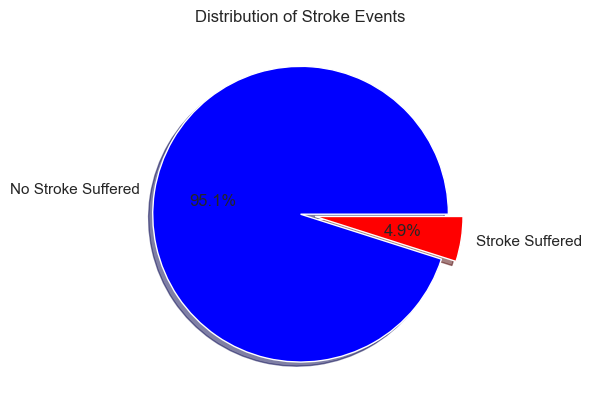

In [79]:
# Data
labels = ['No Stroke Suffered', 'Stroke Suffered']
counts = [4817, 249]
colors = ['blue', 'red']
explode = (0, 0.1)  # To emphasize the "Stroke Suffered" slice

# Create a pie chart
plt.pie(counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)

plt.title('Distribution of Stroke Events')

plt.show()

Dataset is an example of highly imbalanced data, as stroke suffered people being minority class.

### Resampling Data as Dataset is Imbalanced

In [80]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [81]:
X_1 = df2.drop(columns=['stroke'])
y_1 = df2['stroke']

In [82]:
# with use of SMOTE and undersampler

resampling_pipeline = Pipeline([
    ('oversampler', SMOTE(sampling_strategy=1.0, random_state=42)),
    ('undersampler', RandomUnderSampler(sampling_strategy=1.0, random_state=42))
])


X, y = resampling_pipeline.fit_resample(X_1, y_1)

### Splitting the Data into Test and Train

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
# splitting training and testind data 80% and 20% resp.(pipeline)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

### Standard Scaling

In [85]:
# no data leakage

scaler = StandardScaler()    

X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

In [86]:
print(X.shape)
print(X_train_standard.shape)
print(X_test_standard.shape)

(9634, 10)
(7707, 10)
(1927, 10)


## Modeling and Evaluations

### Decision Tree Classifier 

In [118]:
dt = DecisionTreeClassifier()

In [88]:
dt.fit(X_train_standard, y_train)

DecisionTreeClassifier()

In [108]:
feature_names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
feature_names

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [89]:
dt.feature_importances_

array([0.02668088, 0.49303002, 0.00824864, 0.01092045, 0.02178594,
       0.05457764, 0.02766631, 0.19056385, 0.13706663, 0.02945962])

In [90]:
y_pred_dt = dt.predict(X_test_standard)
y_pred_dt

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [91]:
y_test

5250    1
5641    1
4625    0
2766    0
2111    0
       ..
455     0
8496    1
1197    0
6000    1
8204    1
Name: stroke, Length: 1927, dtype: int64

In [92]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(accuracy_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(conf_matrix_dt)
class_report_dt = classification_report(y_test, y_pred_dt)
print(class_report_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print(roc_auc_dt)

0.909704203425013
[[890 110]
 [ 64 863]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1000
           1       0.89      0.93      0.91       927

    accuracy                           0.91      1927
   macro avg       0.91      0.91      0.91      1927
weighted avg       0.91      0.91      0.91      1927

0.9104800431499461


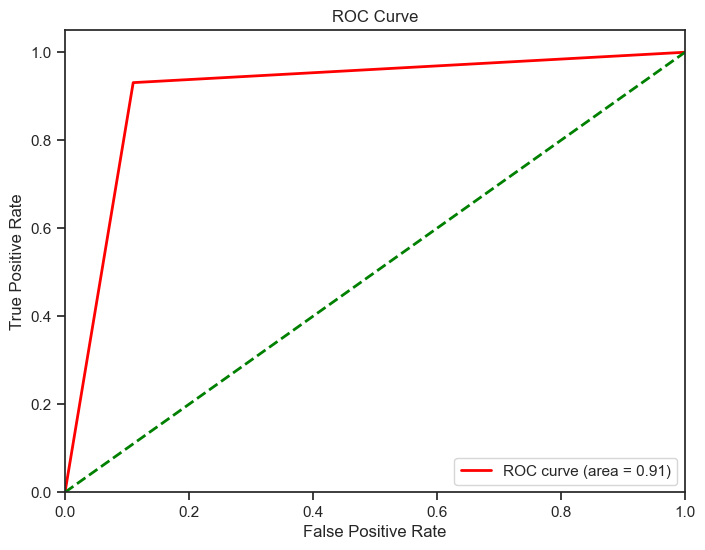

In [93]:
# Get the ROC curve data
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

# Calculate the AUC (Area Under the Curve)
roc_auc_dt = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest Classifier 

In [99]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)

In [100]:
rf.fit(X_train_standard, y_train)

RandomForestClassifier(random_state=1)

In [109]:
feature_names

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [101]:
rf.feature_importances_

array([0.02470235, 0.43716525, 0.01541911, 0.012966  , 0.02013088,
       0.07978115, 0.02654961, 0.18333544, 0.15040968, 0.04954054])

In [102]:
y_pred_rf = rf.predict(X_test_standard)
y_pred_rf

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [103]:
y_test

5250    1
5641    1
4625    0
2766    0
2111    0
       ..
455     0
8496    1
1197    0
6000    1
8204    1
Name: stroke, Length: 1927, dtype: int64

In [104]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(accuracy_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
print(class_report_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(roc_auc_rf)

0.9465490399584847
[[928  72]
 [ 31 896]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1000
           1       0.93      0.97      0.95       927

    accuracy                           0.95      1927
   macro avg       0.95      0.95      0.95      1927
weighted avg       0.95      0.95      0.95      1927

0.9472793959007552


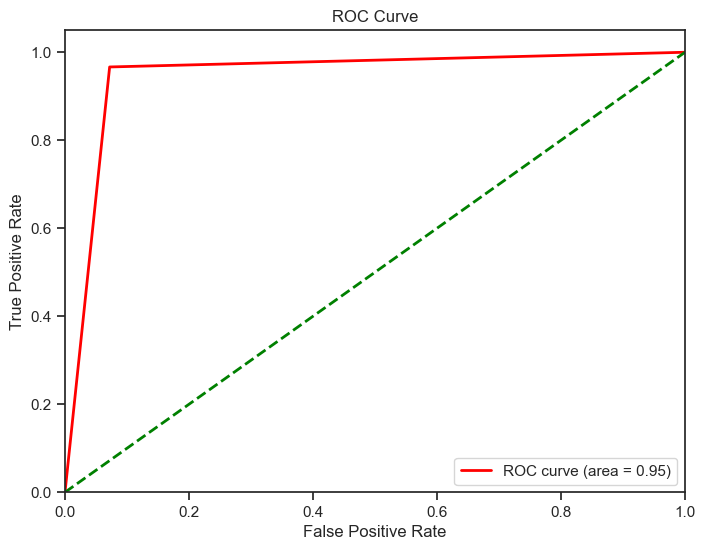

In [105]:
# Get the ROC curve data
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

# Calculate the AUC (Area Under the Curve)
roc_auc_rf = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### XG Boost Classifier

In [110]:
xgbc=xgb.XGBClassifier(random_state=1)

In [111]:
xgbc.fit(X_train_standard, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [119]:
feature_names

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [120]:
xgbc.feature_importances_

array([0.08512055, 0.18523383, 0.09569965, 0.15672214, 0.12697671,
       0.11112994, 0.07790557, 0.05542073, 0.05181487, 0.05397603],
      dtype=float32)

In [112]:
y_pred_xg = xgbc.predict(X_test_standard)
y_pred_xg

array([1, 1, 0, ..., 0, 1, 1])

In [113]:
y_test

5250    1
5641    1
4625    0
2766    0
2111    0
       ..
455     0
8496    1
1197    0
6000    1
8204    1
Name: stroke, Length: 1927, dtype: int64

In [114]:
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(accuracy_xg)
conf_matrix_xg = confusion_matrix(y_test, y_pred_xg)
print(conf_matrix_xg)
class_report_xg = classification_report(y_test, y_pred_xg)
print(class_report_xg)
roc_auc_xg = roc_auc_score(y_test, y_pred_xg)
print(roc_auc_xg)

0.941359626362221
[[924  76]
 [ 37 890]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1000
           1       0.92      0.96      0.94       927

    accuracy                           0.94      1927
   macro avg       0.94      0.94      0.94      1927
weighted avg       0.94      0.94      0.94      1927

0.9420431499460626


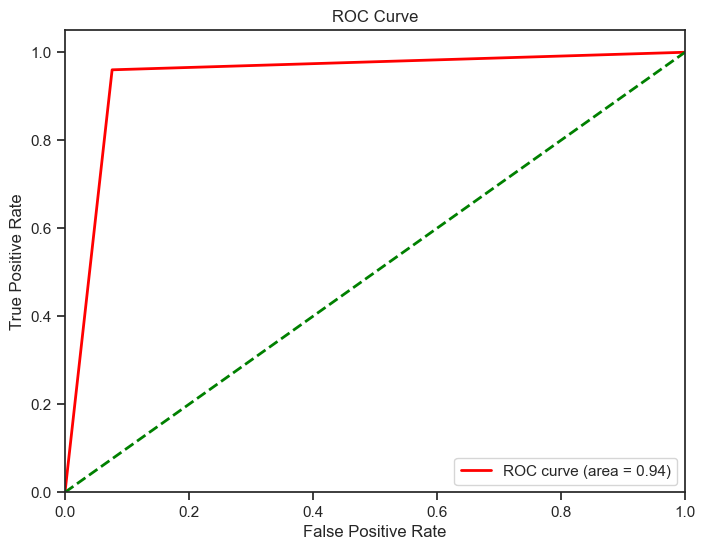

In [115]:
# Get the ROC curve data
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xg)

# Calculate the AUC (Area Under the Curve)
roc_auc_xg = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_xg))
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Logistic Regression

In [121]:
lr=LogisticRegression(random_state=1)

In [122]:
lr.fit(X_train_standard, y_train)

LogisticRegression(random_state=1)

In [123]:
y_pred_lr = lr.predict(X_test_standard)
y_pred_lr

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [124]:
y_test

5250    1
5641    1
4625    0
2766    0
2111    0
       ..
455     0
8496    1
1197    0
6000    1
8204    1
Name: stroke, Length: 1927, dtype: int64

In [127]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(accuracy_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix_lr)
class_report_lr = classification_report(y_test, y_pred_lr)
print(class_report_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
print(roc_auc_lr)

0.779449922158796
[[757 243]
 [182 745]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1000
           1       0.75      0.80      0.78       927

    accuracy                           0.78      1927
   macro avg       0.78      0.78      0.78      1927
weighted avg       0.78      0.78      0.78      1927

0.7803338727076592


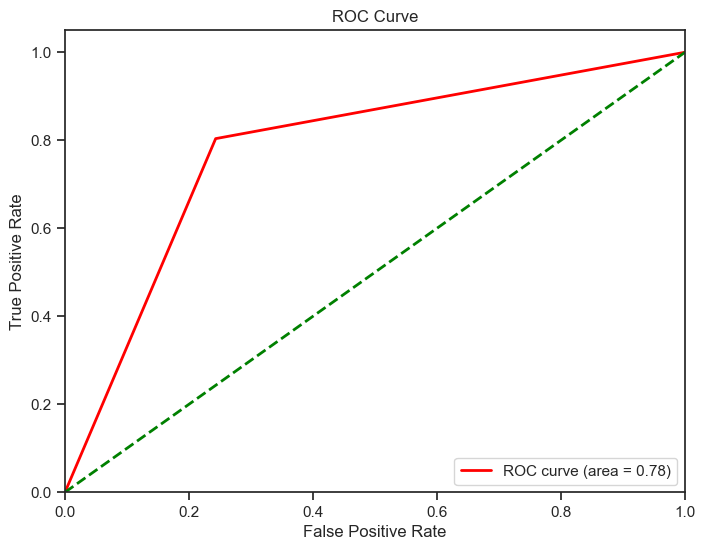

In [128]:
# Get the ROC curve data
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)

# Calculate the AUC (Area Under the Curve)
roc_auc_lr = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Naive Bayes Classifier

In [129]:
gnb = GaussianNB()

In [130]:
gnb.fit(X_train_standard, y_train)

GaussianNB()

In [135]:
y_pred_gnb = gnb.predict(X_test_standard)
y_pred_gnb

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [136]:
y_test

5250    1
5641    1
4625    0
2766    0
2111    0
       ..
455     0
8496    1
1197    0
6000    1
8204    1
Name: stroke, Length: 1927, dtype: int64

In [137]:
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(accuracy_gnb)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
print(conf_matrix_gnb)
class_report_gnb = classification_report(y_test, y_pred_gnb)
print(class_report_gnb)
roc_auc_gnb = roc_auc_score(y_test, y_pred_gnb)
print(roc_auc_gnb)

0.7389724961079398
[[528 472]
 [ 31 896]]
              precision    recall  f1-score   support

           0       0.94      0.53      0.68      1000
           1       0.65      0.97      0.78       927

    accuracy                           0.74      1927
   macro avg       0.80      0.75      0.73      1927
weighted avg       0.81      0.74      0.73      1927

0.7472793959007551


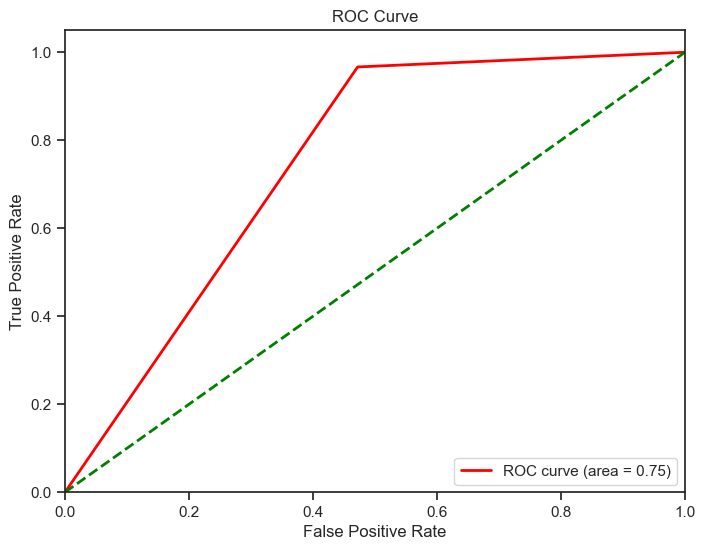

In [138]:
# Get the ROC curve data
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gnb)

# Calculate the AUC (Area Under the Curve)
roc_auc_gnb = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_gnb))
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Results & Conclusion

In conclusion, the analysis of the data on stroke prediction reveals several key insights:

Age, Hypertension, Avg_glucose level & Heart disease are significant factors positively correlated with the risk of stroke. Demographic factors such as ever_married, work_type, and smoking_status are also important to consider. These variables provide valuable information for predicting stroke risk.

The ROC-AUC metric is an appropriate choice for evaluating classification models, especially when dealing with imbalanced data. It measures a model's ability to distinguish between those at risk of stroke and those who are not.

After evaluating five different classification models, the Random Forest Classifier stands out as the most effective model, with a high ROC-AUC score of 0.947. This suggests that it is the best choice for predicting stroke risk in this context.

On the other hand, the Naïve Bayes classifier achieved the lowest ROC-AUC score of 0.75, indicating that it may not be as suitable for this specific classification task.

In summary, when it comes to predicting stroke risk, the Random Forest Classifier outperforms the other models, making it the preferred choice. However, It's essential to consider various factors, including model interpretability and computational efficiency, when making a final decision. Further optimization and fine-tuning of the Random Forest model may be necessary to ensure its effectiveness for specific application.
